In [3]:
import numpy as numpy
from scipy import ndimage, fft
import matplotlib
import matplotlib.pyplot as plt
from utils.utils import *

plt.rcParams.update({'figure.dpi': '50'})



Failed to import TF-Keras. Please note that TF-Keras is not installed by default when you install TensorFlow Probability. This is so that JAX-only users do not have to install TensorFlow or TF-Keras. To use TensorFlow Probability with TensorFlow, please install the tf-keras or tf-keras-nightly package.
This can be be done through installing the tensorflow-probability[tf] extra.




ModuleNotFoundError: No module named 'tf_keras'

Text(0.5, 1.0, 'DCT LaplaceX')

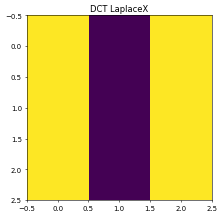

In [ ]:
t = np.zeros((3,3))
t[0, 2] =1

dct_basis = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1))
plt.imshow(dct_basis[..., 0,0])
plt.title("DCT LaplaceX")

(1, 3, 3, 1) (1, 3, 3, 1) (1, 3, 3, 1)


Text(0.5, 1.0, 'AntiSym')

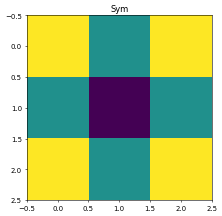

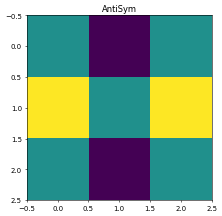

In [ ]:
dct_basis_s, dct_basis_a = getSymAntiSymTF(dct_basis)
plt.figure(0)
plt.imshow(dct_basis_s[..., 0,0])
plt.title('Sym')
plt.figure(1)
plt.imshow(dct_basis_a[..., 0,0])
plt.title('AntiSym')


Text(0.5, 1.0, 'dct')

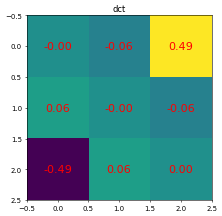

In [ ]:
dct_basis_of_anti = fft.idctn(dct_basis_a[..., 0,0].numpy(), norm='ortho')

fig, ax = plt.subplots()
im = ax.imshow(dct_basis_of_anti)
for i in range(3):
    for j in range(3):
        text = ax.text(j, i, f"{dct_basis_of_anti[i, j]:.2f}",
                       ha="center", va="center", color="r", fontsize=16)\
                       
plt.title("dct")

In [ ]:
dct_basis_of_anti

array([[-8.32667268e-17, -5.97865779e-02,  4.92799280e-01],
       [ 5.97865779e-02, -4.85722573e-17, -5.97865779e-02],
       [-4.92799280e-01,  5.97865779e-02,  3.81639165e-17]])

Text(0.5, 1.0, 'DCT LaplaceY')

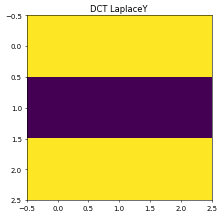

In [ ]:
t = np.zeros((3,3))
t[2, 0] =1

dct_basis = np.reshape(fft.idctn(t, norm='ortho'), (3,3,1,1))
plt.imshow(dct_basis[..., 0,0])
plt.title("DCT LaplaceY")

(1, 3, 3, 1) (1, 3, 3, 1) (1, 3, 3, 1)


Text(0.5, 1.0, 'AntiSym')

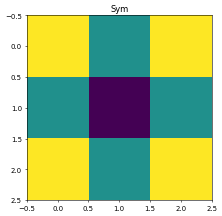

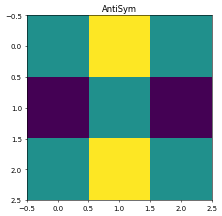

In [ ]:
dct_basis_s, dct_basis_a = getSymAntiSymTF(dct_basis)
plt.figure(0)
plt.imshow(dct_basis_s[..., 0,0])
plt.title('Sym')
plt.figure(1)
plt.imshow(dct_basis_a[..., 0,0])
plt.title('AntiSym')

Text(0.5, 1.0, 'AntiSym')

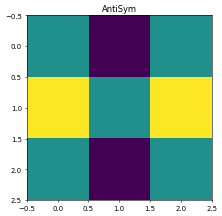

In [ ]:
plt.imshow(-dct_basis_a[..., 0,0])
plt.title('AntiSym')

In [ ]:
t = np.zeros((3,3))
t[1, 0] =1

a = fft.idctn(t, norm='ortho')
t = np.zeros((3,3))
t[1, 0] =1

b = fft.idctn(t, norm='ortho')

Text(0.5, 1.0, 'AntiSym')

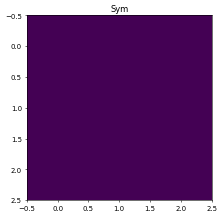

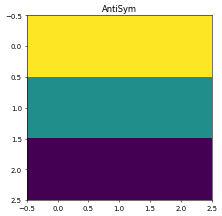

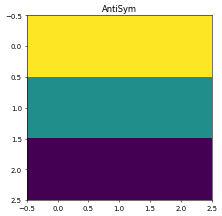

In [ ]:
plt.figure(0)
plt.imshow(a)
plt.title('Sym')
plt.figure(1)
plt.imshow(b)
plt.title('AntiSym')
plt.figure(2)
plt.imshow(b*a)
plt.title('AntiSym')

In [ ]:
x =  [[(0,0)], [(0,1), (1,0)], [(1,1)], [(2,0), (0,2)], [(1,2), (2,1)], [(2,2)] ]
len(sum(x[-3:], []))

5